/kaggle/input/gender-detection-and-classification-image-dataset/gender_detection.csv
/kaggle/input/gender-detection-and-classification-image-dataset/test/men/149.jpg
/kaggle/input/gender-detection-and-classification-image-dataset/test/men/143.jpg
/kaggle/input/gender-detection-and-classification-image-dataset/test/men/115.jpg
/kaggle/input/gender-detection-and-classification-image-dataset/test/men/131.jpg
/kaggle/input/gender-detection-and-classification-image-dataset/test/men/118.jpg
/kaggle/input/gender-detection-and-classification-image-dataset/test/men/113.jpg
/kaggle/input/gender-detection-and-classification-image-dataset/test/men/130.jpg
/kaggle/input/gender-detection-and-classification-image-dataset/test/men/120.jpg
/kaggle/input/gender-detection-and-classification-image-dataset/test/men/124.jpg
/kaggle/input/gender-detection-and-classification-image-dataset/test/men/123.jpg
/kaggle/input/gender-detection-and-classification-image-dataset/test/men/112.jpg
/kaggle/input/gender-det

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  7/100 ━━━━━━━━━━━━━━━━━━━━ 1:24 906ms/step - accuracy: 0.5076 - loss: 1.2976

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 269ms/step - accuracy: 0.5090 - loss: 1.1053 - val_accuracy: 0.5000 - val_loss: 0.7323
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 222ms/step - accuracy: 0.5108 - loss: 0.6968 - val_accuracy: 0.5000 - val_loss: 0.7046
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 260ms/step - accuracy: 0.5009 - loss: 0.6939 - val_accuracy: 0.5136 - val_loss: 0.6921
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 219ms/step - accuracy: 0.5075 - loss: 0.6929 - val_accuracy: 0.5409 - val_loss: 0.6920
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 260ms/step - accuracy: 0.5276 - loss: 0.6935 - val_accuracy: 0.5773 - val_loss: 0.6902
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 220ms/step - accuracy: 0.5179 - loss: 0.6911 - val_accuracy: 0.5773 - val_loss: 0.6864
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 217ms/step - accuracy: 0.5317 - loss: 0.6905 - val_accuracy: 0.5773 - val_loss: 0.6820
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 214ms/step - accuracy: 0.5241 - loss: 0.6903 - val

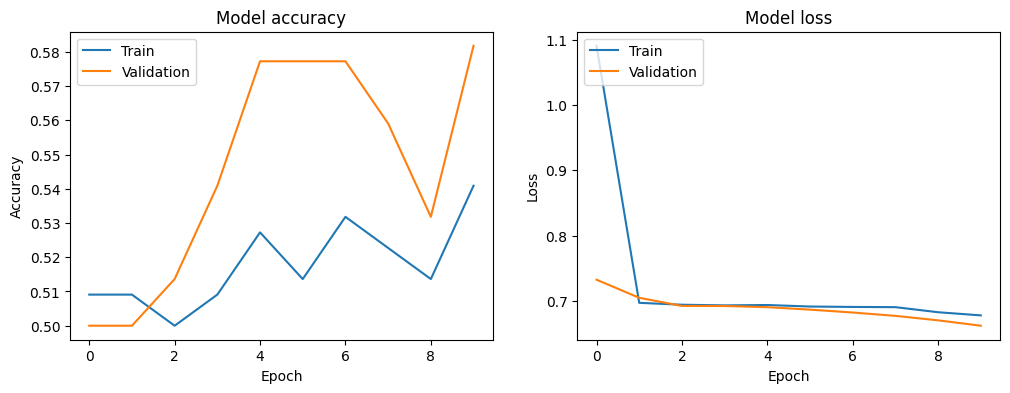

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to the training and validation datasets
train_dir = '/kaggle/input/gender-detection-and-classification-image-dataset/train'
validation_dir = '/kaggle/input/gender-detection-and-classification-image-dataset/train'

# Create an ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training dataset
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

# Load and preprocess the validation dataset
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                            target_size=(150, 150),
                                                            batch_size=32,
                                                            class_mode='binary')
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=50)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation accuracy: {accuracy*100:.2f}%')
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session